<a href="https://colab.research.google.com/github/lonecoder007/practice_projects-of-Artificial-neural-network/blob/master/fit_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [ ]:
from google.colab import files
files.upload()

In [14]:
!cp kaggle.json ~/.kaggle/

In [15]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-06-23 00:53:41          83628  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53          14356  
mikahama/the-best-sarcasm-annotated-dataset-in-spanish      The Best Sarcasm Annotated Dataset in Spanish        26KB  2020-06-21 16:50:44             41  
shubh0799/churn-modelling                                   Churn Modelling                                     262KB  2020-06-20 17:33:28            306  
josehenriqueroveda/fertilizers-by-product-fao               Fert

In [18]:
!kaggle datasets list -s dogs-cats-horses-human


ref                                               title                                            size  lastUpdated          downloadCount  
------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  
sanikamal/horses-or-humans-dataset                Horses Or Humans Dataset                        307MB  2019-04-24 20:09:38           1503  
eabdul/dogs-cats-horses-humans-dataset            dogs-cats-horses-humans-dataset                  39MB  2019-07-08 01:00:02            181  
rishitdagli/horses-vs-humans                      Horses vs Humans                                154MB  2020-01-02 12:35:54             37  
uciml/horse-colic                                 Horse Colic Dataset                              11KB  2017-06-06 19:24:16           2820  
wanglaiqi/pimaindiansdiabetesdata                 pima-indians-diabetes.data                        9KB  2017-10-12 07:49:20           1165  
donw38

In [23]:
!kaggle datasets download -d eabdul/dogs-cats-horses-humans-dataset -p/content ## content/filename 

 49% 19.0M/38.6M [00:00<00:00, 198MB/s]
100% 38.6M/38.6M [00:00<00:00, 189MB/s]


In [24]:
!unzip \*.zip # !unzip folder name

Archive:  dogs-cats-horses-humans-dataset.zip
  inflating: dataset/cats/cat.1.jpg  
  inflating: dataset/cats/cat.10.jpg  
  inflating: dataset/cats/cat.100.jpg  
  inflating: dataset/cats/cat.101.jpg  
  inflating: dataset/cats/cat.102.jpg  
  inflating: dataset/cats/cat.103.jpg  
  inflating: dataset/cats/cat.104.jpg  
  inflating: dataset/cats/cat.105.jpg  
  inflating: dataset/cats/cat.106.jpg  
  inflating: dataset/cats/cat.107.jpg  
  inflating: dataset/cats/cat.108.jpg  
  inflating: dataset/cats/cat.109.jpg  
  inflating: dataset/cats/cat.11.jpg  
  inflating: dataset/cats/cat.110.jpg  
  inflating: dataset/cats/cat.111.jpg  
  inflating: dataset/cats/cat.112.jpg  
  inflating: dataset/cats/cat.113.jpg  
  inflating: dataset/cats/cat.114.jpg  
  inflating: dataset/cats/cat.115.jpg  
  inflating: dataset/cats/cat.116.jpg  
  inflating: dataset/cats/cat.117.jpg  
  inflating: dataset/cats/cat.118.jpg  
  inflating: dataset/cats/cat.119.jpg  
  inflating: dataset/cats/cat.12.jpg  

In [25]:
!ls

dataset  dogs-cats-horses-humans-dataset.zip  kaggle.json  sample_data


In [31]:
import os 
folder=os.listdir('dataset/dataset')
folder

['horses', 'dogs', 'cats', 'humans']

In [33]:
for f in folder:
  path='dataset/dataset/'+f
  print(f," ",len(os.listdir(path)))

horses   202
dogs   202
cats   202
humans   202


In [36]:
from keras.preprocessing import image
import matplotlib.pyplot as plt


In [46]:
sample_path='dataset/dataset/cats/cat.10.jpg'
img=image.load_img(sample_path)

In [47]:
x=image.img_to_array(img)/255.0

In [48]:
x.shape

(499, 489, 3)

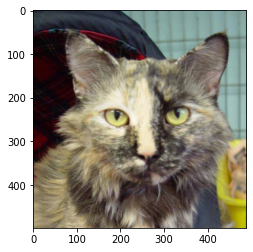

In [49]:
plt.imshow(x)

In [51]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [107]:
 model=Sequential()
 model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
 model.add(MaxPool2D((2,2)))

 model.add(Conv2D(64,(3,3),activation='relu'))
 model.add(MaxPool2D((2,2)))
 model.add(Conv2D(128,(3,3),activation='relu'))
 model.add(MaxPool2D((2,2)))
 model.add(Conv2D(128,(3,3),activation='relu'))
 model.add(MaxPool2D((2,2)))

 model.add(Flatten())
 model.add(Dense(64,activation='relu'))
 model.add(Dense(4,activation='softmax'))

In [108]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)      

In [109]:
from keras import optimizers
adam=optimizers.adam(lr=1e-4)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [111]:
train_gen=image.ImageDataGenerator(rescale=1/255.0)

In [112]:
train_generator=train_gen.flow_from_directory(
    'dataset/dataset/',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 724 images belonging to 4 classes.


In [77]:
train_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [78]:
train_generator.next()

(array([[[[0.97647065, 0.9921569 , 0.9960785 ],
          [0.97647065, 0.9921569 , 0.9960785 ],
          [0.97647065, 0.9921569 , 0.9960785 ],
          ...,
          [0.7411765 , 0.8235295 , 0.89019614],
          [0.7490196 , 0.8235295 , 0.89019614],
          [0.7490196 , 0.8235295 , 0.89019614]],
 
         [[0.97647065, 0.9921569 , 0.9960785 ],
          [0.97647065, 0.9921569 , 0.9960785 ],
          [0.97647065, 0.9921569 , 0.9960785 ],
          ...,
          [0.7607844 , 0.8352942 , 0.8941177 ],
          [0.7568628 , 0.8235295 , 0.8862746 ],
          [0.7568628 , 0.8235295 , 0.8862746 ]],
 
         [[0.9803922 , 0.9960785 , 1.        ],
          [0.9803922 , 0.9960785 , 1.        ],
          [0.9803922 , 0.9960785 , 1.        ],
          ...,
          [0.7607844 , 0.8313726 , 0.8862746 ],
          [0.7607844 , 0.8235295 , 0.882353  ],
          [0.7607844 , 0.8235295 , 0.882353  ]],
 
         ...,
 
         [[0.98823535, 0.98823535, 0.9803922 ],
          [0.99215

In [79]:
model.fit_generator(train_generator,epochs=40,steps_per_epoch=7)

Epoch 1/40
7/7 [==============================] - 1s 136ms/step - loss: 1.4168 - accuracy: 0.2812
Epoch 2/40
7/7 [==============================] - 1s 93ms/step - loss: 1.3765 - accuracy: 0.2950
Epoch 3/40
7/7 [==============================] - 1s 103ms/step - loss: 1.3618 - accuracy: 0.2455
Epoch 4/40
7/7 [==============================] - 1s 97ms/step - loss: 1.3036 - accuracy: 0.3125
Epoch 5/40
7/7 [==============================] - 1s 98ms/step - loss: 1.2394 - accuracy: 0.5100
Epoch 6/40
7/7 [==============================] - 1s 103ms/step - loss: 1.2053 - accuracy: 0.4732
Epoch 7/40
7/7 [==============================] - 1s 106ms/step - loss: 1.1966 - accuracy: 0.4375
Epoch 8/40
7/7 [==============================] - 1s 108ms/step - loss: 1.1205 - accuracy: 0.5670
Epoch 9/40
7/7 [==============================] - 1s 103ms/step - loss: 1.0930 - accuracy: 0.4955
Epoch 10/40
7/7 [==============================] - 1s 103ms/step - loss: 0.9537 - accuracy: 0.6071
Epoch 11/40
7/7 [=====

In [80]:
import shutil

In [83]:
if not os.path.isdir('val_images'):
  os.mkdir('val_images')
classes=['dogs','cats','horses','humans']
!ls

dataset  kaggle.json  sample_data  val_images


In [104]:
for c in classes:
  p=os.path.join('val_images',c)
  if not os.path.isdir(p):
    os.mkdir(p)

split=0.9
for f in os.listdir('dataset/dataset'):
  path='dataset/dataset/'+f
  imgs=os.listdir(path)

  split_size=int(split*len(imgs))
  files_to_move=imgs[split_size:]

  for img_f in files_to_move:
    src=os.path.join(path,img_f)
    dest=os.path.join('val_images/'+f,img_f)
    shutil.move(src,dest)



In [124]:
val_gen=image.ImageDataGenerator(rescale=1/255.0)


In [121]:
p=os.path.join('dataset/dataset','crat')

In [131]:
val_generator=val_gen.flow_from_directory(
    'val_images/',
    target_size=(150,150),
    batch_size=32
)

Found 84 images belonging to 4 classes.


In [132]:
hist=model.fit_generator(
    train_generator,
    epochs=40,
    steps_per_epoch=7,
    validation_data=val_generator,
    validation_steps=4
)

Epoch 1/40
7/7 [==============================] - 1s 174ms/step - loss: 1.2943 - accuracy: 0.3868 - val_loss: 1.2850 - val_accuracy: 0.4310
Epoch 2/40
7/7 [==============================] - 1s 154ms/step - loss: 1.2975 - accuracy: 0.3661 - val_loss: 1.3249 - val_accuracy: 0.3448
Epoch 3/40
7/7 [==============================] - 1s 116ms/step - loss: 1.2826 - accuracy: 0.3795 - val_loss: 1.2987 - val_accuracy: 0.4327
Epoch 4/40
7/7 [==============================] - 1s 148ms/step - loss: 1.1632 - accuracy: 0.4811 - val_loss: 1.3072 - val_accuracy: 0.4741
Epoch 5/40
7/7 [==============================] - 1s 144ms/step - loss: 1.1307 - accuracy: 0.5045 - val_loss: 1.1665 - val_accuracy: 0.4569
Epoch 6/40
7/7 [==============================] - 1s 136ms/step - loss: 1.0959 - accuracy: 0.4643 - val_loss: 1.1392 - val_accuracy: 0.5385
Epoch 7/40
7/7 [==============================] - 1s 141ms/step - loss: 0.9734 - accuracy: 0.6116 - val_loss: 1.1837 - val_accuracy: 0.5690
Epoch 8/40
7/7 [====

In [133]:
hist=hist.history

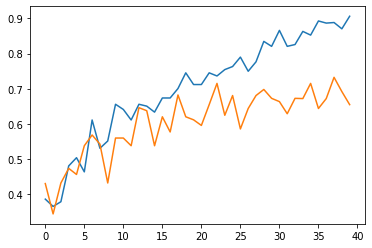

In [134]:
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])

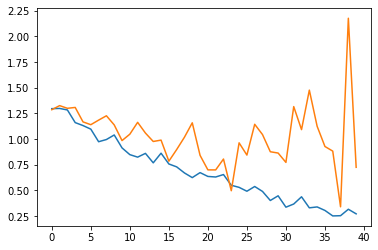

In [135]:
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])